In [1]:
# STEP 1: Authenticate and download dataset from GCS
from google.colab import files
uploaded = files.upload()  # Upload your service account JSON key

import os
json_filename = list(uploaded.keys())[0]
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = json_filename

GCS_URI = "gs://onion11"
!mkdir -p OnionData
!gsutil -m cp -r {GCS_URI}/* OnionData/

Streaming output truncated to the last 5000 lines.
Copying gs://onion11/BR_E5_P3_S_0582_FEB_7.JPG...
Copying gs://onion11/BR_E5_P3_S_0582_FEB_7.txt...
Copying gs://onion11/BR_E5_P3_S_0583_FEB_7.JPG...
Copying gs://onion11/BR_E5_P3_S_0583_FEB_7.txt...
Copying gs://onion11/BR_E5_P3_S_0694__FEB_8.JPG...
Copying gs://onion11/BR_E5_P3_S_0694__FEB_8.txt...
Copying gs://onion11/BR_E5_P3_S_0695__FEB_8.JPG...
Copying gs://onion11/BR_E5_P3_S_0695__FEB_8.txt...
Copying gs://onion11/BR_E5_P3_S_0735_FEB_9.JPG...
Copying gs://onion11/BR_E5_P3_S_0735_FEB_9.txt...
Copying gs://onion11/BR_E5_P3_S_0736_FEB_9.JPG...
Copying gs://onion11/BR_E5_P3_S_0736_FEB_9.txt...
Copying gs://onion11/BR_E5_P3_S_0787__FEB_14.JPG...
Copying gs://onion11/BR_E5_P3_S_0787__FEB_14.txt...
Copying gs://onion11/BR_E5_P3_S_0788__FEB_14.JPG...
Copying gs://onion11/BR_E5_P3_S_0788__FEB_14.txt...
Copying gs://onion11/BR_E5_P3_S_0832__FEB_14.JPG...
Copying gs://onion11/BR_E5_P3_S_0832__FEB_14.txt...
Copying gs://onion11/BR_E5_P3_S_0

In [3]:
import os, shutil, random

base_dir = "OnionData"
class_id_to_name = {}
classes_txt_path = os.path.join(base_dir, 'classes.txt')

# Load class ID to class name mapping
if os.path.exists(classes_txt_path):
    with open(classes_txt_path) as f:
        for i, line in enumerate(f):
            class_id_to_name[str(i)] = line.strip()

# Match image and label files
jpgs = {os.path.splitext(f)[0]: f for f in os.listdir(base_dir) if f.endswith('.jpg')}
txts = {os.path.splitext(f)[0]: f for f in os.listdir(base_dir) if f.endswith('.txt')}
paired = [base for base in jpgs if base in txts]

# Create mapping from class to list of image filenames
class_to_images = {}
for base in paired:
    txt_path = os.path.join(base_dir, txts[base])
    with open(txt_path) as f:
        line = f.readline().strip()
        if not line:
            continue  # Skip empty txt files
        parts = line.split()
        if len(parts) == 0:
            continue  # Skip malformed txt files
        class_id = parts[0]
        label = class_id_to_name.get(class_id, f"class_{class_id}")
        class_to_images.setdefault(label, []).append(jpgs[base])

# Create folders for splits
for split in ['train', 'val', 'test']:
    for label in class_to_images:
        os.makedirs(os.path.join(split, label), exist_ok=True)

# Split data: 70% train, 15% val, 15% test
for label, images in class_to_images.items():
    random.shuffle(images)
    n = len(images)
    t, v = int(0.7 * n), int(0.15 * n)
    for img in images[:t]:
        shutil.copy(os.path.join(base_dir, img), os.path.join('train', label, img))
    for img in images[t:t+v]:
        shutil.copy(os.path.join(base_dir, img), os.path.join('val', label, img))
    for img in images[t+v:]:
        shutil.copy(os.path.join(base_dir, img), os.path.join('test', label, img))



In [4]:
!pip install transformers timm torchmetrics seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [5]:
import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
from transformers import DeiTForImageClassification
import numpy as np
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data augmentation to reduce overfitting
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_ds = ImageFolder("train", transform=train_transform)
val_ds = ImageFolder("val", transform=val_test_transform)
test_ds = ImageFolder("test", transform=val_test_transform)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)

# Load DeiT model
model = DeiTForImageClassification.from_pretrained(
    "facebook/deit-base-distilled-patch16-224",
    num_labels=len(train_ds.classes)
)
model.classifier.dropout = nn.Dropout(0.3)  # Add dropout
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/349M [00:00<?, ?B/s]

Some weights of DeiTForImageClassification were not initialized from the model checkpoint at facebook/deit-base-distilled-patch16-224 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [6]:
epochs = 10
patience = 5
best_val_loss = float("inf")
trigger_times = 0

train_accs, val_accs, train_losses, val_losses = [], [], [], []
start_time = time.time()

for epoch in range(epochs):
    model.train()
    total_train_loss, correct_train = 0, 0
    for imgs, lbls in train_loader:
        imgs, lbls = imgs.to(device), lbls.to(device)
        optimizer.zero_grad()
        outputs = model(imgs).logits
        loss = criterion(outputs, lbls)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item() * imgs.size(0)
        correct_train += (outputs.argmax(1) == lbls).sum().item()

    train_acc = correct_train / len(train_ds)
    train_loss = total_train_loss / len(train_ds)
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    total_val_loss, correct_val = 0, 0
    with torch.no_grad():
        for imgs, lbls in val_loader:
            imgs, lbls = imgs.to(device), lbls.to(device)
            outputs = model(imgs).logits
            loss = criterion(outputs, lbls)
            total_val_loss += loss.item() * imgs.size(0)
            correct_val += (outputs.argmax(1) == lbls).sum().item()

    val_acc = correct_val / len(val_ds)
    val_loss = total_val_loss / len(val_ds)
    val_accs.append(val_acc)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}: Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}, Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        torch.save(model.state_dict(), "best_model.pt")
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping!")
            break

training_time = time.time() - start_time
model.load_state_dict(torch.load("best_model.pt"))


Epoch 1: Train Acc=0.6539, Val Acc=0.7925, Train Loss=1.0156, Val Loss=0.6747
Epoch 2: Train Acc=0.8203, Val Acc=0.7862, Train Loss=0.5084, Val Loss=0.4967
Epoch 3: Train Acc=0.8481, Val Acc=0.8176, Train Loss=0.4028, Val Loss=0.4336
Epoch 4: Train Acc=0.8864, Val Acc=0.8491, Train Loss=0.3402, Val Loss=0.3747
Epoch 5: Train Acc=0.9022, Val Acc=0.8679, Train Loss=0.2809, Val Loss=0.3512
Epoch 6: Train Acc=0.9168, Val Acc=0.8742, Train Loss=0.2554, Val Loss=0.3428
Epoch 7: Train Acc=0.9300, Val Acc=0.8679, Train Loss=0.2182, Val Loss=0.3489
Epoch 8: Train Acc=0.9353, Val Acc=0.8553, Train Loss=0.1948, Val Loss=0.3098
Epoch 9: Train Acc=0.9392, Val Acc=0.8805, Train Loss=0.1828, Val Loss=0.3095
Epoch 10: Train Acc=0.9432, Val Acc=0.9119, Train Loss=0.1623, Val Loss=0.2824


<All keys matched successfully>

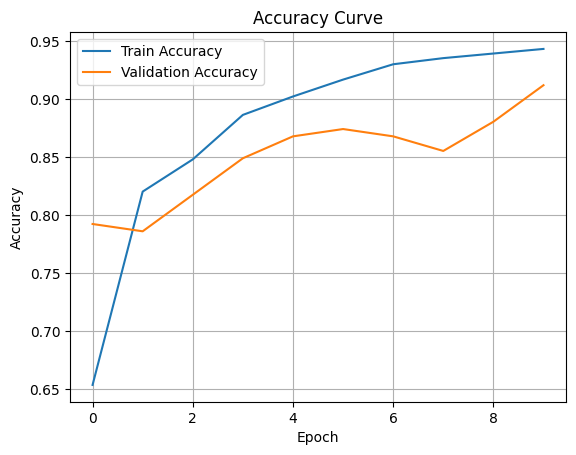


📊 Classification Report:
                         precision    recall  f1-score   support

           Anthracnose       0.91      0.85      0.88        47
             Basal_Rot       1.00      0.67      0.80         3
Iris_Yellow_Spot_Virus       0.97      1.00      0.99        37
         Purple_Blotch       0.69      0.60      0.64        15
    Stemphylium_Blight       0.75      0.95      0.84        22
                Thrips       1.00      0.98      0.99        45

              accuracy                           0.91       169
             macro avg       0.89      0.84      0.86       169
          weighted avg       0.91      0.91      0.90       169



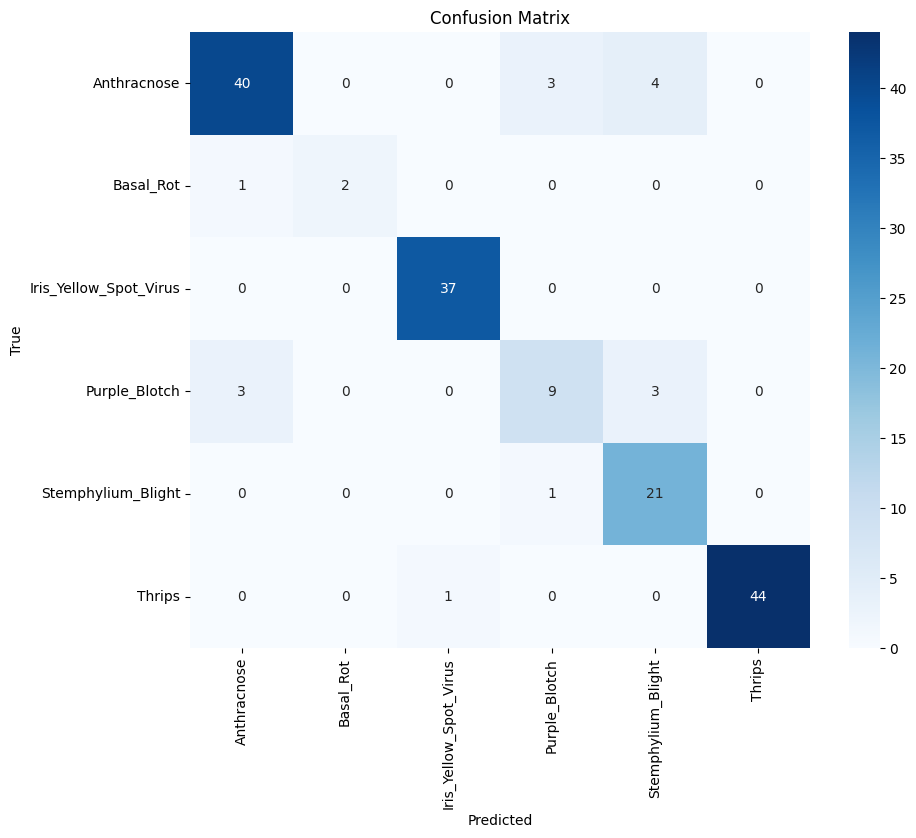

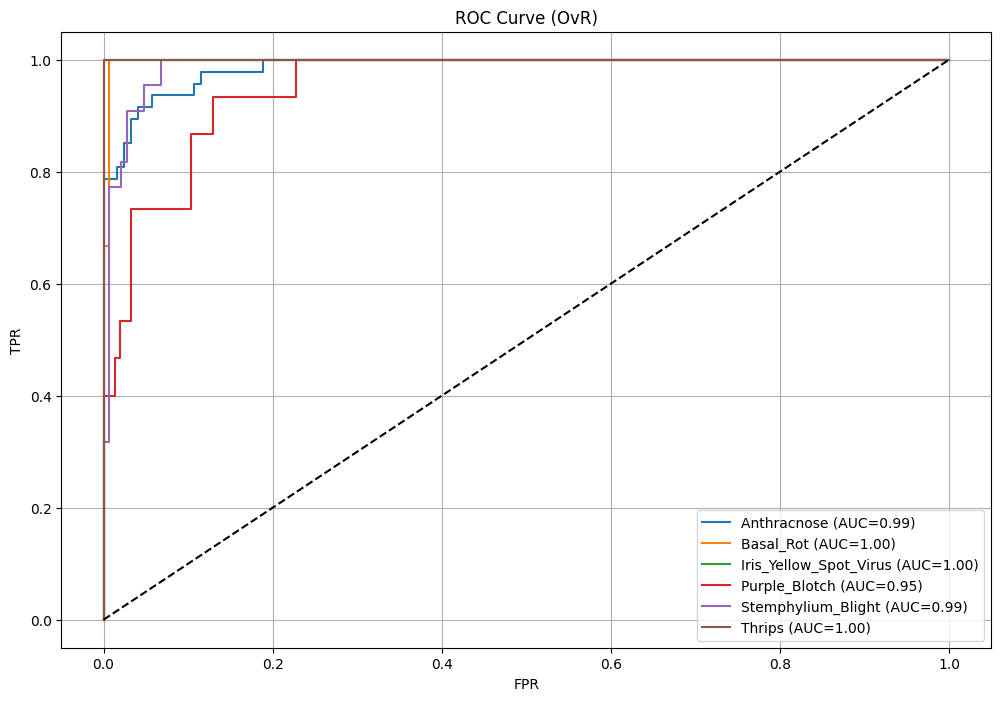


✅ Final Train Accuracy: 94.32%
✅ Final Validation Accuracy: 91.19%
✅ Test Accuracy: 90.53%
⏱️ Total Training Time: 1937.65 seconds
📦 Model Size: 327.32 MB


In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
y_true, y_probs = [], []

with torch.no_grad():
    for imgs, lbls in test_loader:
        imgs = imgs.to(device)
        outputs = model(imgs).logits
        y_probs.append(outputs.cpu())
        y_true.append(lbls)

y_probs = torch.cat(y_probs).softmax(dim=1).numpy()
y_pred = np.argmax(y_probs, axis=1)
y_true = torch.cat(y_true).numpy()
class_labels = train_ds.classes

# Accuracy Curve
plt.plot(train_accs, label="Train Accuracy")
plt.plot(val_accs, label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()
plt.grid(True)
plt.show()

# Classification Report
print("\n📊 Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC-AUC
y_true_bin = label_binarize(y_true, classes=range(len(class_labels)))
plt.figure(figsize=(12, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_labels[i]} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve (OvR)")
plt.legend()
plt.grid(True)
plt.show()

# Summary
model_size = sum(p.numel() for p in model.parameters() if p.requires_grad) * 4 / (1024**2)
print(f"\n✅ Final Train Accuracy: {train_accs[-1]*100:.2f}%")
print(f"✅ Final Validation Accuracy: {val_accs[-1]*100:.2f}%")
print(f"✅ Test Accuracy: {(y_pred == y_true).mean()*100:.2f}%")
print(f"⏱️ Total Training Time: {training_time:.2f} seconds")
print(f"📦 Model Size: {model_size:.2f} MB")
